# K - Means Clustering on Iris dataset (Unsupervised machine learning)

# Importing relevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
iris_data=pd.read_csv("iris.csv")
iris_data.info()
iris_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# here we see that there are no null values and also the first column is Id which is not relevant for clustering,
so we primarily be focussing on the next four columns to get the numerical values and accordingly use the k means for them

In [5]:
x=iris_data.iloc[:,1:5].values #selecting sepal length , width , petal length and width
from sklearn.cluster import KMeans
ssv=[] #creating an array for sum of squares due to variation within clusters

for i in range(1,12):
    kmeans=KMeans(n_clusters=i,init="k-means++",
                 max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    ssv.append(kmeans.inertia_) # Here we get the Sum of squares for different valies of K



# Plotting the sum of squares due to variation within clusters for differfent values of k

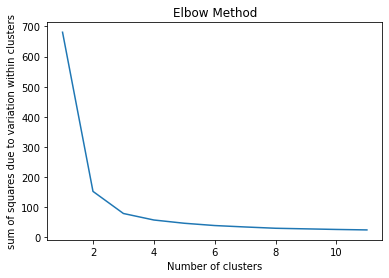

In [6]:
plt.plot(range(1,12),ssv)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("sum of squares due to variation within clusters")
plt.show()

# Since it looks like an elbow , hence the method is called "Elbow Method"; 
moreover we see that the slope of curve i.e. the sum of squares due to variation within clusters changes drastically after
no of clusters is 3 , hence we take k=3.

# Applying K-Means on the data for clustering

In [9]:
kmeans=KMeans(n_clusters=3,init="k-means++", # value of K=3, so total no of clusters formed will be 3.
              max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
             

# Visualizing the clusters

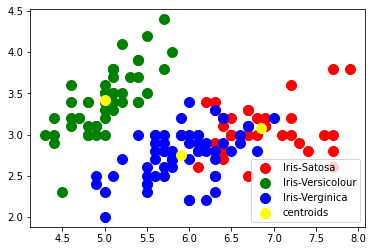

In [13]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,
           c='red',label='Iris-Satosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,
            c='green',label='Iris-Versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,
           c='blue',label='Iris-Verginica')
# plotting the centroids in the dataset
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,
           c='yellow',label='centroids')
plt.legend()

# Unsupervised clustering has been done using K-Means Algorithm
and we can visualize above with centroids with yellow colour.
